In [1]:
"""Получение и вывод в консоль свечей с часовым интервалом за 3 дня"""
import pandas as pd
import os
from pprint import pprint
from datetime import timedelta

from tinkoff.invest import CandleInterval, Client
from tinkoff.invest.schemas import CandleSource
from tinkoff.invest.utils import now

TOKEN = os.environ["TINKOFF_TOKEN"]


def main():
    candles = []
    with Client(TOKEN) as client:
        for candle in client.get_all_candles(
            instrument_id="BBG004730N88",
            from_=now() - timedelta(days=3),
            interval=CandleInterval.CANDLE_INTERVAL_HOUR,
            candle_source_type=CandleSource.CANDLE_SOURCE_UNSPECIFIED,
        ):
            candles.append(candle)
            

    return candles
# df = pd.DataFrame(main)
# df.to_csv('tinkoff.csv', index=False)
# df
candle_list = main()

if __name__ == "__main__":
    main()

In [2]:
pprint(candle_list)

[HistoricCandle(open=Quotation(units=265, nano=960000000),
                high=Quotation(units=266, nano=400000000),
                low=Quotation(units=265, nano=860000000),
                close=Quotation(units=266, nano=210000000),
                volume=92347,
                time=datetime.datetime(2024, 9, 17, 18, 0, tzinfo=datetime.timezone.utc),
                is_complete=True,
                candle_source=<CandleSource.CANDLE_SOURCE_EXCHANGE: 1>),
 HistoricCandle(open=Quotation(units=266, nano=220000000),
                high=Quotation(units=266, nano=240000000),
                low=Quotation(units=266, nano=0),
                close=Quotation(units=266, nano=90000000),
                volume=59080,
                time=datetime.datetime(2024, 9, 17, 19, 0, tzinfo=datetime.timezone.utc),
                is_complete=True,
                candle_source=<CandleSource.CANDLE_SOURCE_EXCHANGE: 1>),
 HistoricCandle(open=Quotation(units=266, nano=60000000),
                high=Quot

In [3]:
candles = candle_list

In [4]:
from datetime import datetime, timezone

# Эмуляция класса Quotation
class Quotation:
    def __init__(self, units, nano):
        self.units = units
        self.nano = nano

# Эмуляция класса HistoricCandle
class HistoricCandle:
    def __init__(self, open, high, low, close, volume, time, is_complete, candle_source):
        self.open = open
        self.high = high
        self.low = low
        self.close = close
        self.volume = volume
        self.time = time
        self.is_complete = is_complete
        self.candle_source = candle_source

# Эмуляция Enum для CandleSource
class CandleSource:
    CANDLE_SOURCE_EXCHANGE = 1

# Функция для преобразования 'Quotation' в полное значение
def to_full_value(quotation):
    return quotation.units + quotation.nano / 1e9

# Преобразование списка объектов в список словарей
candle_dicts = []
for candle in candles:
    candle_dict = {
        'open': to_full_value(candle.open),
        'high': to_full_value(candle.high),
        'low': to_full_value(candle.low),
        'close': to_full_value(candle.close),
        'volume': candle.volume,
        'time': candle.time.strftime('%Y-%m-%d %H:%M:%S')
    }
    candle_dicts.append(candle_dict)

# Результат
# print(candle_dicts)


In [5]:
# df = pd.DataFrame(candles_list)
# df

In [6]:
# candlestick_data = df.copy()


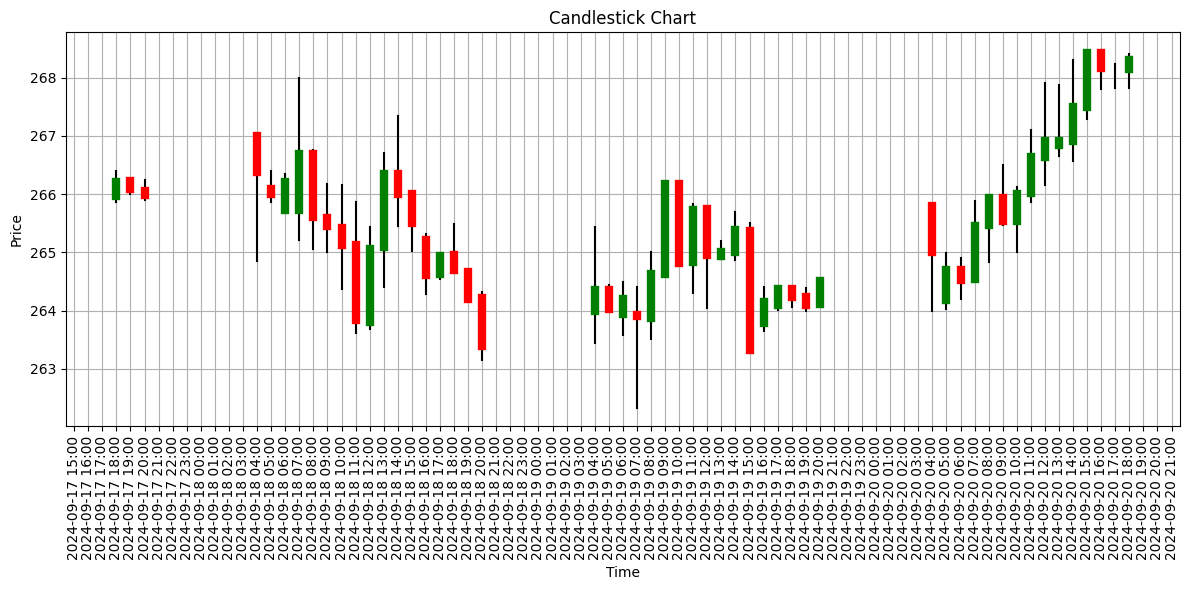

In [7]:
# вывод свечей
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Convert nano to full value for plotting
def to_full_value(data):
    return data['units'] + data['nano'] / 1e9

# Provided candlestick data
candlestick_data = candle_dicts

# Parse the times and format them for the x-axis
times = [datetime.strptime(item['time'], '%Y-%m-%d %H:%M:%S') for item in candlestick_data]
opens = [item['open'] for item in candlestick_data]
highs = [item['high'] for item in candlestick_data]
lows = [item['low'] for item in candlestick_data]
closes = [item['close'] for item in candlestick_data]

# Create figure and axis
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
# Plot candlestick bars
for i in range(len(candlestick_data)):
    color = 'green' if closes[i] > opens[i] else 'red'
    ax.plot([times[i], times[i]], [lows[i], highs[i]], color='black')  # high-low line
    ax.plot([times[i], times[i]], [opens[i], closes[i]], color=color, linewidth=6)  # open-close bar

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.set_title('Candlestick Chart')

# Format x-axis to show dates clearly
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))

# Rotate the x-ticks for better readability
plt.xticks(rotation=90)

# Show grid
ax.grid(True)

plt.tight_layout()
plt.show()
